<a href="https://colab.research.google.com/github/ibnyusupzhon/database7_week/blob/main/Colaboratory%EC%97%90_%EC%98%A4%EC%8B%A0_%EA%B2%83%EC%9D%84_%ED%99%98%EC%98%81%ED%95%A9%EB%8B%88%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3 as sl
con = sl.connect('my-test.db')

In [2]:
with con:
    con.execute("""
        CREATE TABLE USER (
            id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
            name TEXT,
            age INTEGER
        );
    """)

In [3]:
sql = 'INSERT INTO USER (id, name, age) values(?, ?, ?)'
data = [
    (1, 'Alice', 21),
    (2, 'Bob', 22),
    (3, 'Chris', 23)
]

In [4]:
with con:
    con.executemany(sql, data)

In [5]:
with con:
    data = con.execute("SELECT * FROM USER WHERE age <= 22")
    for row in data:
        print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


In [6]:
import pandas as pd
df_skill = pd.DataFrame({
    'user_id': [1,1,2,2,3,3,3],
    'skill': ['Network Security', 'Algorithm Development', 'Network Security', 'Java', 'Python', 'Data Science', 'Machine Learning']
})
df_skill

,user_id,skill
0,1,Network Security
1,1,Algorithm Development
2,2,Network Security
3,2,Java
4,3,Python
5,3,Data Science
6,3,Machine Learning


In [7]:
df_skill.to_sql('SKILL', con)
df = pd.read_sql('''
    SELECT s.user_id, u.name, u.age, s.skill 
    FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id
''', con)

df

,user_id,name,age,skill
0,1,Alice,21,Algorithm Development
1,1,Alice,21,Network Security
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Data Science
5,3,Chris,23,Machine Learning
6,3,Chris,23,Python


In [8]:
df.to_sql('USER_SKILL', con)

In [9]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

In [10]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

In [11]:
%sql SELECT date('now'

 * sqlite:///demo.db3
(sqlite3.OperationalError) incomplete input
[SQL: SELECT date('now']
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [12]:
%sql SELECT date('now','start of month','+1 month','-1 day');

 * sqlite:///demo.db3
Done.


"date('now','start of month','+1 month','-1 day')"
2022-11-30


In [13]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL

Done.
(sqlite3.OperationalError) incomplete input
[SQL: CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [14]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

(sqlite3.OperationalError) no such table: main.Temperature
[SQL: CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [15]:
def dt(days):
    return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
    timestamp = now - dt(days=(N_rows - i))
    temperature = uniform(18, 26)
    %sql INSERT INTO Temperature VALUES (:timestamp, :temperature); 

 * sqlite:///demo.db3
(sqlite3.OperationalError) no such table: Temperature
[SQL: INSERT INTO Temperature VALUES (?, ?);]
[parameters: (datetime.datetime(2021, 7, 12, 8, 1, 14, 509653), 21.10602170583074)]
(Background on this error at: https://sqlalche.me/e/14/e3q8)
 * sqlite:///demo.db3
(sqlite3.OperationalError) no such table: Temperature
[SQL: INSERT INTO Temperature VALUES (?, ?);]
[parameters: (datetime.datetime(2021, 7, 13, 8, 1, 14, 509653), 22.16617190648627)]
(Background on this error at: https://sqlalche.me/e/14/e3q8)
 * sqlite:///demo.db3
(sqlite3.OperationalError) no such table: Temperature
[SQL: INSERT INTO Temperature VALUES (?, ?);]
[parameters: (datetime.datetime(2021, 7, 14, 8, 1, 14, 509653), 21.401571532417524)]
(Background on this error at: https://sqlalche.me/e/14/e3q8)
 * sqlite:///demo.db3
(sqlite3.OperationalError) no such table: Temperature
[SQL: INSERT INTO Temperature VALUES (?, ?);]
[parameters: (datetime.datetime(2021, 7, 15, 8, 1, 14, 509653), 24.166020884

In [16]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
(sqlite3.OperationalError) no such table: Temperature
[SQL: SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [17]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45'

(sqlite3.OperationalError) no such table: Temperature
[SQL: SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45']
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [18]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature 
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

(sqlite3.OperationalError) no such table: Temperature
[SQL: SELECT Timestamp as Date, Temperature 
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [19]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year, 
       AVG(Temperature) AS MEAN_TMP,
       MAX(Temperature) AS MAX_TMP,
       MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

(sqlite3.OperationalError) no such table: Temperature
[SQL: SELECT strftime('%Y', Timestamp) as Year, 
       AVG(Temperature) AS MEAN_TMP,
       MAX(Temperature) AS MAX_TMP,
       MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [26]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True) 
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
(sqlite3.OperationalError) no such table: Temperature
[SQL: SELECT datetime(Timestamp) as date, Temperature FROM Temperature]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


AttributeError: ignored

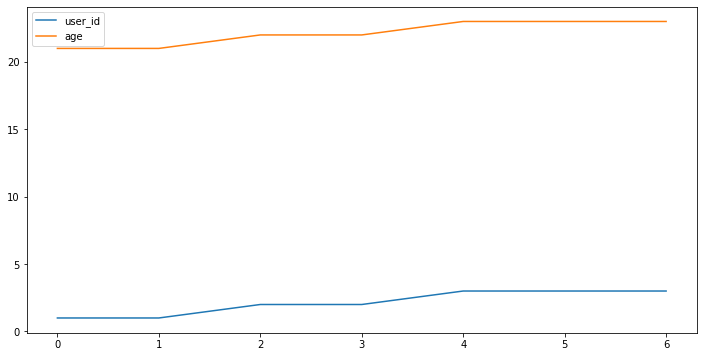

In [22]:
df.plot(figsize=(12, 6))